# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset: Heart Disease Classification
Sumber: UCI Machine Learning Repository / Kaggle
URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset


Deskripsi:
Dataset ini berisi informasi medis pasien untuk memprediksi kemungkinan
penyakit jantung.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [25]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [26]:
df = pd.read_csv('C:/Users/DELL/Downloads/Eksperimen_SML_intan/heart.csv')
print(f"Shape: {df.shape}")
df.head()

Shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [28]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [29]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [30]:
df.duplicated().sum()

723

In [31]:
print("\nTarget Distribution:")
print(df['target'].value_counts())
print(f"\nClass Balance: {df['target'].value_counts(normalize=True) * 100}")


Target Distribution:
target
1    526
0    499
Name: count, dtype: int64

Class Balance: target
1    51.317073
0    48.682927
Name: proportion, dtype: float64


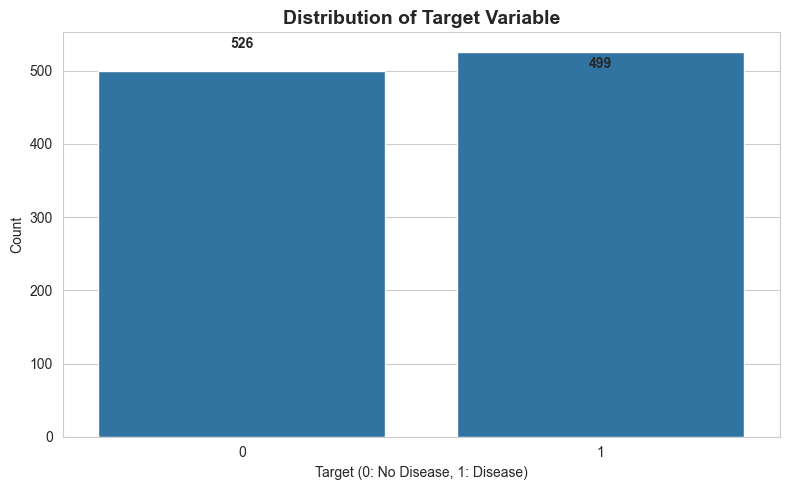

In [32]:
# Target Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='target')
plt.title('Distribution of Target Variable', fontsize=14, fontweight='bold')
plt.xlabel('Target (0: No Disease, 1: Disease)')
plt.ylabel('Count')
for i, v in enumerate(df['target'].value_counts()):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()


Distribusi Fitur numerik:


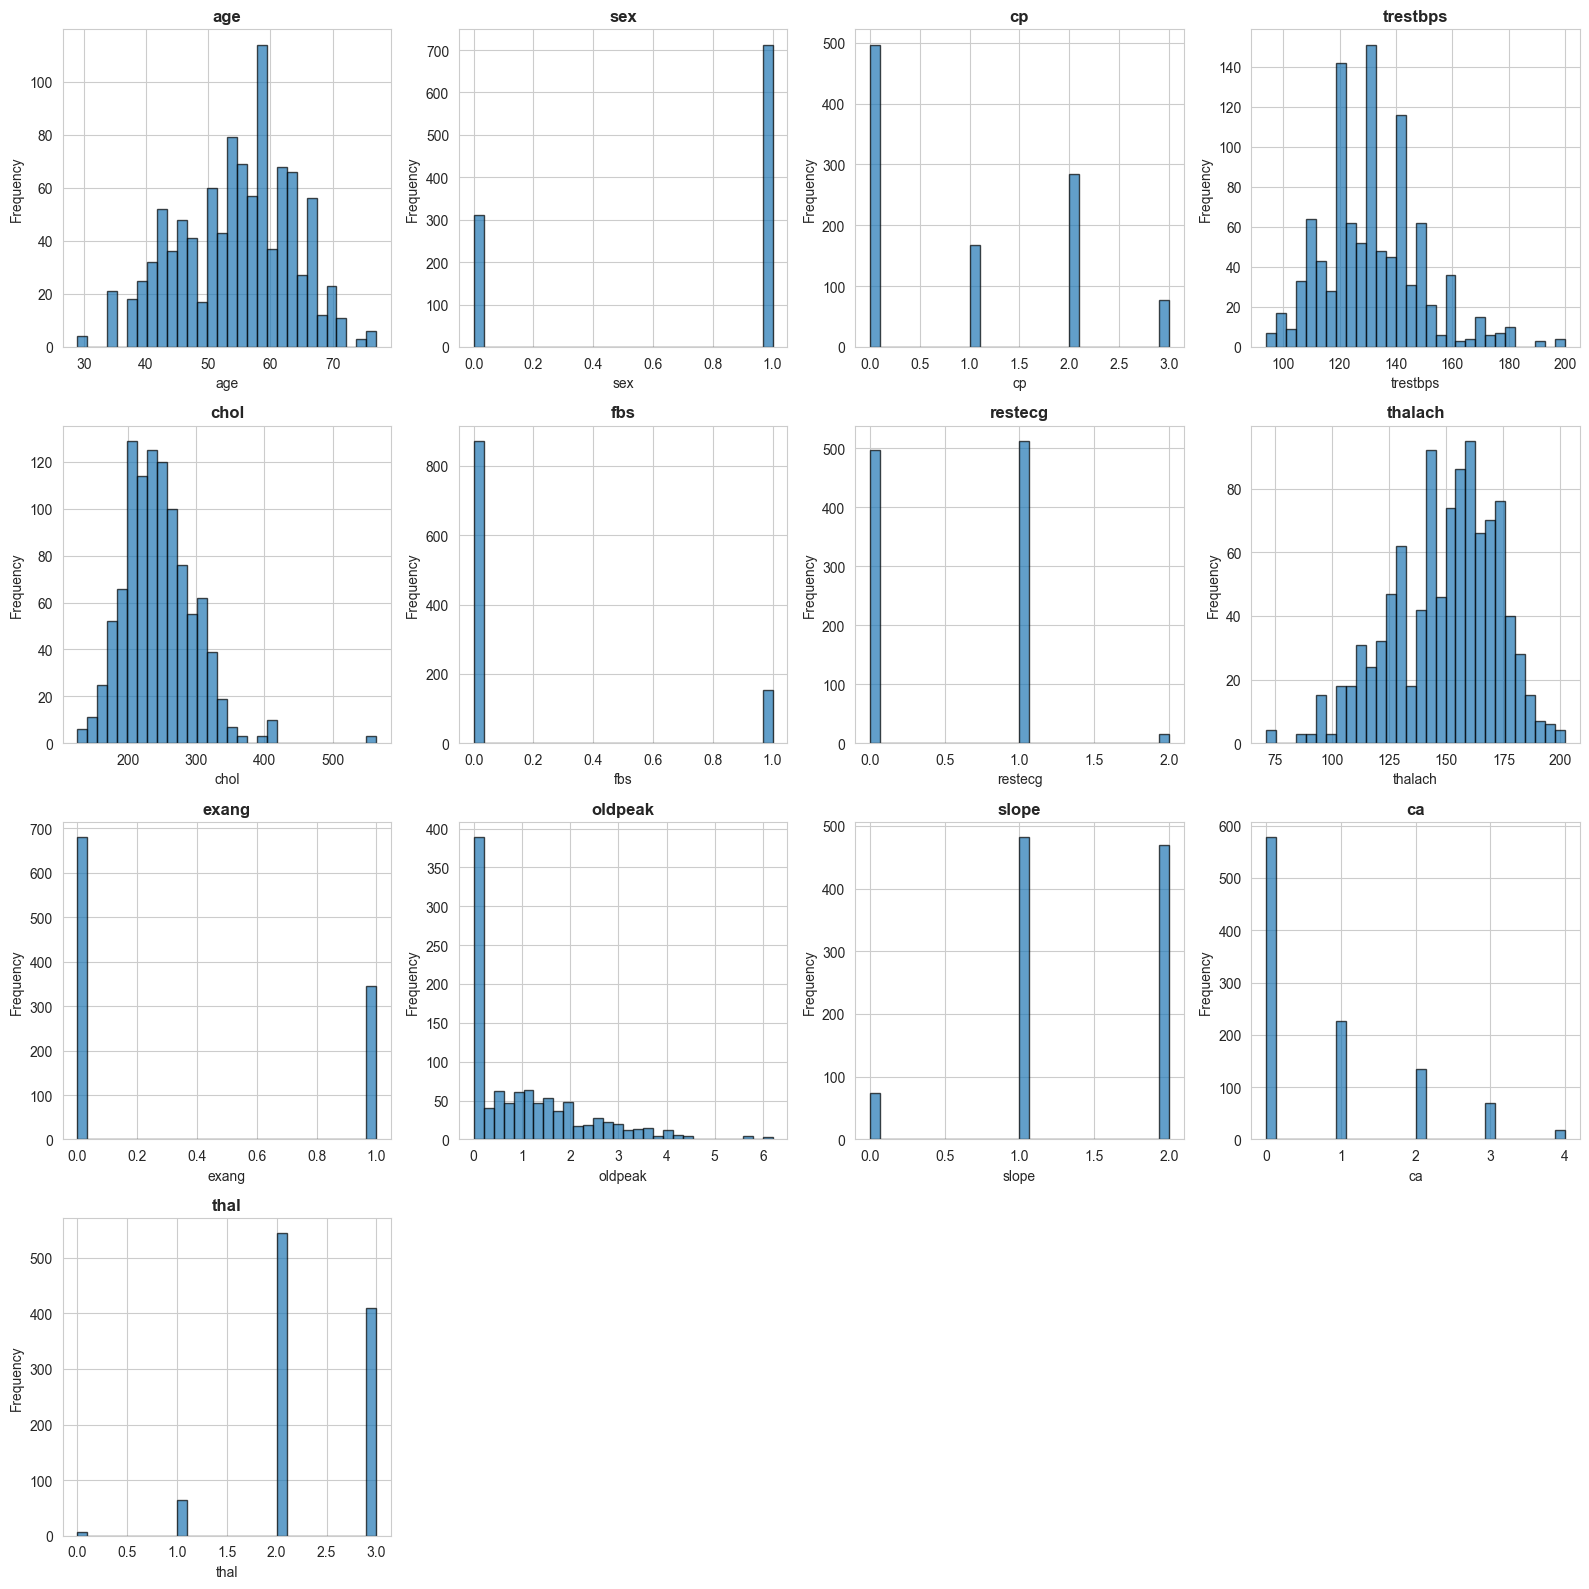

In [33]:
import numpy as np
# Distribusi Fitur numerik
print("\nDistribusi Fitur numerik:")
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('target')

n_cols_per_row = 4
n_rows = int(np.ceil(len(numerical_cols) / n_cols_per_row))

fig, axes = plt.subplots(n_rows, n_cols_per_row, figsize=(16, 4 * n_rows))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{col}', fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


 Correlation Analysis:


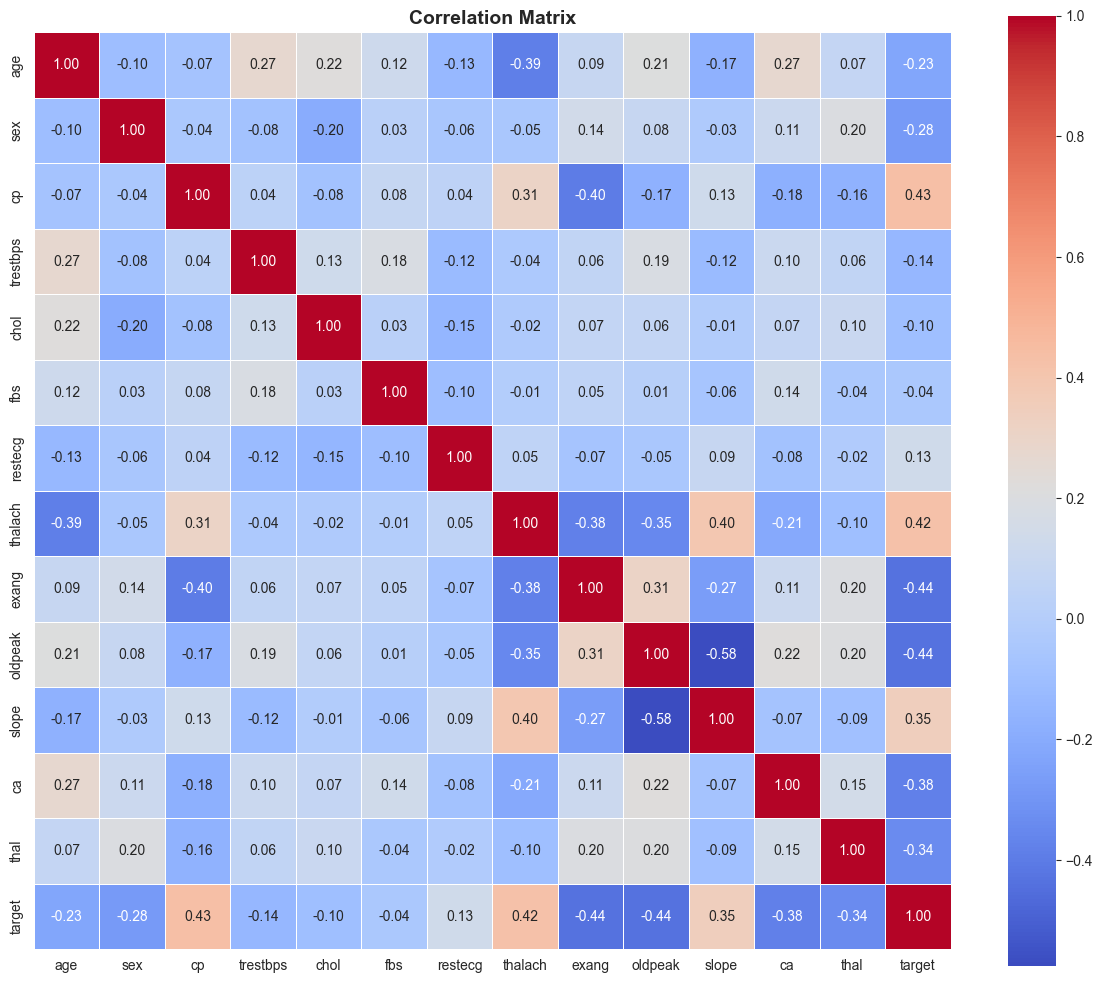


Top correlations dengan target:
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


In [34]:
# Correlation Matrix
print("\n Correlation Analysis:")
plt.figure(figsize=(12, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlations dengan target
print("\nTop correlations dengan target:")
target_corr = correlation['target'].abs().sort_values(ascending=False)
print(target_corr[1:])


Distribusi Fitur Dengan Target:


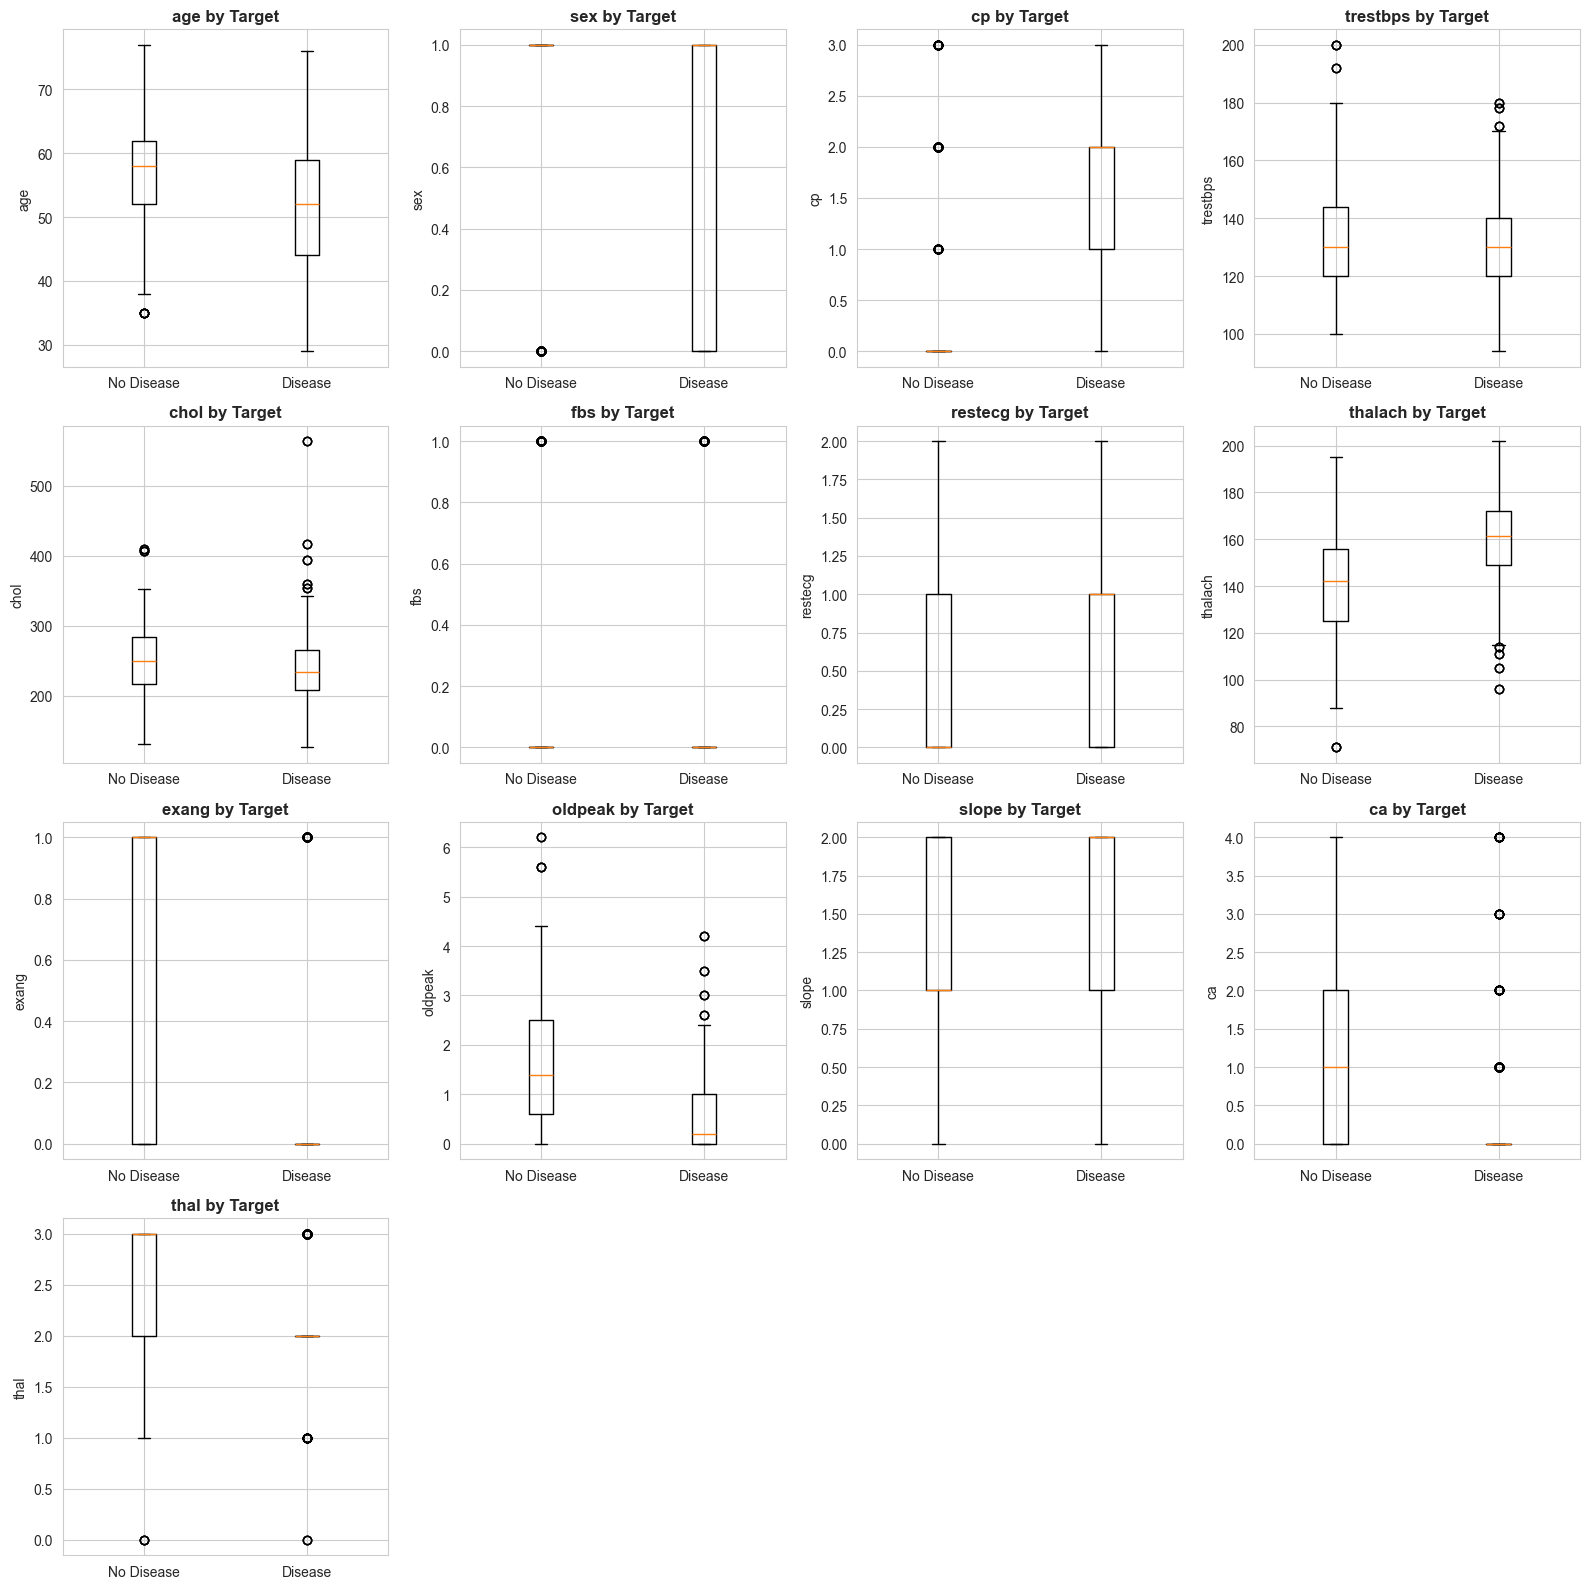

In [35]:
# Distribusi Fitur Dengan Target
print("\nDistribusi Fitur Dengan Target:")

n_cols_per_row = 4
n_rows = int(np.ceil(len(numerical_cols) / n_cols_per_row))

fig, axes = plt.subplots(n_rows, n_cols_per_row, figsize=(16, 4 * n_rows))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        axes[idx].boxplot([df[df['target']==0][col], df[df['target']==1][col]],
                           labels=['No Disease', 'Disease'])
        axes[idx].set_title(f'{col} by Target', fontweight='bold')
        axes[idx].set_ylabel(col)

# Remove any unused subplots
for i in range(len(numerical_cols), len(axes)):
    if i < len(axes):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [36]:
# Deteksi Outlier
print("\nDeteksi Outlier (IQR Method):")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if len(outliers) > 0:
        print(f"{col}: {len(outliers)} outliers terdeteksi")


Deteksi Outlier (IQR Method):
trestbps: 30 outliers terdeteksi
chol: 16 outliers terdeteksi
fbs: 153 outliers terdeteksi
thalach: 4 outliers terdeteksi
oldpeak: 7 outliers terdeteksi
ca: 87 outliers terdeteksi
thal: 7 outliers terdeteksi


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [37]:
df_processed = df.copy()

In [38]:
print("\nHandling Missing Values")
if df_processed.isnull().sum().sum() > 0:
    num_imputer = SimpleImputer(strategy='median')
    numerical_features = df_processed.select_dtypes(include=[np.number]).columns
    df_processed[numerical_features] = num_imputer.fit_transform(df_processed[numerical_features])
    print("Missing values imputed with median")
else:
    print("No missing values to handle")



Handling Missing Values
No missing values to handle


In [39]:
print("\nHandling Duplicates")
initial_rows = len(df_processed)
df_processed = df_processed.drop_duplicates()
removed_duplicates = initial_rows - len(df_processed)
print(f"Removed {removed_duplicates} duplicate rows")


Handling Duplicates
Removed 723 duplicate rows


In [40]:
# Handle Outliers
print("\nHandling Outliers")
for col in numerical_cols:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    df_processed[col] = df_processed[col].clip(lower=lower_bound, upper=upper_bound)

print("Outliers capped using IQR method")


Handling Outliers
Outliers capped using IQR method


In [41]:
# Feature Engineering
print("\nStep 4: Feature Engineering")

df_processed['age_group'] = pd.cut(df_processed['age'],
                                    bins=[0, 40, 50, 60, 100],
                                    labels=['Young', 'Middle', 'Senior', 'Elderly'])

df_processed['chol_category'] = pd.cut(df_processed['chol'],
                                        bins=[0, 200, 240, 500],
                                        labels=['Normal', 'Borderline', 'High'])

print("fitur baru: age_group, chol_category")





Step 4: Feature Engineering
fitur baru: age_group, chol_category


In [42]:
# Encoding Categorical Variables
print("\n Step 5: Encoding Categorical Variables")
# One-hot encoding for new categorical features
df_processed = pd.get_dummies(df_processed, columns=['age_group', 'chol_category'],
                               drop_first=True)
print("Categorical variables encoded")




 Step 5: Encoding Categorical Variables
Categorical variables encoded


In [43]:
# Split Features and Target
print("\nSplitting Features and Target")
X = df_processed.drop('target', axis=1)
y = df_processed['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")




Splitting Features and Target
Features shape: (302, 18)
Target shape: (302,)


In [44]:
# Train-Test Split
print("\nTrain-Test Split")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Train target distribution:\n{y_train.value_counts()}")
print(f"Test target distribution:\n{y_test.value_counts()}")




Train-Test Split
Train set: (241, 18)
Test set: (61, 18)
Train target distribution:
target
1    131
0    110
Name: count, dtype: int64
Test target distribution:
target
1    33
0    28
Name: count, dtype: int64


In [45]:
# Feature Scaling
print("\nFeature Scaling (Standardization)")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Features scaled using StandardScaler")



Feature Scaling (Standardization)
Features scaled using StandardScaler


In [46]:
print("\nSaving Preprocessed Data")
X_train_scaled.to_csv('X_train_preprocessed.csv', index=False)
X_test_scaled.to_csv('X_test_preprocessed.csv', index=False)
y_train.to_csv('y_train_preprocessed.csv', index=False)
y_test.to_csv('y_test_preprocessed.csv', index=False)

print("\nFiles saved:")
print("  - X_train_preprocessed.csv")
print("  - X_test_preprocessed.csv")
print("  - y_train_preprocessed.csv")
print("  - y_test_preprocessed.csv")


Saving Preprocessed Data

Files saved:
  - X_train_preprocessed.csv
  - X_test_preprocessed.csv
  - y_train_preprocessed.csv
  - y_test_preprocessed.csv
